<a href="https://colab.research.google.com/github/gjaynir0508/climate-change-analysis/blob/main/DAV_CourseEndProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Change Analysis
(View GitHub repository for more code - https://github.com/gjaynir0508/climate-change-analysis)

## Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Datasets
Using Kaggle API to download datasets.

Reference -
https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gjaynir0508","key":"e0c36e7692c293054d51f2e5984e4c55"}'}

In [ ]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 May 14 03:27 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
License(s): CC-BY-NC-SA-4.0
 87% 74.0M/84.7M [00:00<00:00, 136MB/s]
100% 84.7M/84.7M [00:00<00:00, 127MB/s]


In [ ]:
!unzip /content/climate-change-earth-surface-temperature-data.zip -d datasets

Archive:  /content/climate-change-earth-surface-temperature-data.zip
  inflating: datasets/GlobalLandTemperaturesByCity.csv  
  inflating: datasets/GlobalLandTemperaturesByCountry.csv  
  inflating: datasets/GlobalLandTemperaturesByMajorCity.csv  
  inflating: datasets/GlobalLandTemperaturesByState.csv  
  inflating: datasets/GlobalTemperatures.csv  


In [ ]:
# To delete the datasets (archive and unzipped) and your kaggle.json file
# !rm -r /content/climate-change* /content/datasets kaggle.json

# Loading the Datasets from CSV files

In [ ]:
df = pd.read_csv("datasets/GlobalTemperatures.csv")
df

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062  

[3192 rows x 9 columns]

# Exploratory Data Analysis

## Available data
  datasets/GlobalLandTemperaturesByCity.csv  
  datasets/GlobalLandTemperaturesByCountry.csv  
  datasets/GlobalLandTemperaturesByMajorCity.csv  
  datasets/GlobalLandTemperaturesByState.csv  
  datasets/GlobalTemperatures.csv

In [ ]:
# Loading all datasets
globTemp = pd.read_csv("datasets/GlobalTemperatures.csv")
globTempCountry = pd.read_csv("datasets/GlobalLandTemperaturesByCountry.csv")
globTempState = pd.read_csv("datasets/GlobalLandTemperaturesByState.csv")
globTempMajCity = pd.read_csv("datasets/GlobalLandTemperaturesByMajorCity.csv")
globTempCity = pd.read_csv("datasets/GlobalLandTemperaturesByCity.csv")

In [ ]:
print(globTemp.shape)
print(globTempCountry.shape)
print(globTempState.shape)
print(globTempMajCity.shape)
print(globTempCity.shape)

(3192, 9)
(577462, 4)
(645675, 5)
(239177, 7)
(8599212, 7)


## Info and Describe

In [ ]:
print(globTemp.info())
print()
globTemp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB
None



LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

In [ ]:
print(globTempCountry.info())
print()
globTempCountry.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB
None



AverageTemperature  AverageTemperatureUncertainty
count       544811.000000                  545550.000000
mean            17.193354                       1.019057
std             10.953966                       1.201930
min            -37.658000                       0.052000
25%             10.025000                       0.323000
50%             20.901000                       0.571000
75%             25.814000                       1.206000
max             38.842000                      15.003000

In [ ]:
print(globTempState.info())
print()
globTempState.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB
None



AverageTemperature  AverageTemperatureUncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%             19.899000                       1.850000
max             36.339000                      12.646000

In [ ]:
print(globTempMajCity.info())
print()
globTempMajCity.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB
None



AverageTemperature  AverageTemperatureUncertainty
count       228175.000000                  228175.000000
mean            18.125969                       0.969343
std             10.024800                       0.979644
min            -26.772000                       0.040000
25%             12.710000                       0.340000
50%             20.428000                       0.592000
75%             25.918000                       1.320000
max             38.283000                      14.037000

In [ ]:
print(globTempCity.info())
print()
globTempCity.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB
None



AverageTemperature  AverageTemperatureUncertainty
count        8.235082e+06                   8.235082e+06
mean         1.672743e+01                   1.028575e+00
std          1.035344e+01                   1.129733e+00
min         -4.270400e+01                   3.400000e-02
25%          1.029900e+01                   3.370000e-01
50%          1.883100e+01                   5.910000e-01
75%          2.521000e+01                   1.349000e+00
max          3.965100e+01                   1.539600e+01

# Data Preprocessing

In [ ]:
# Handling missing data
# Checking for missing data
print(globTemp.isnull().sum(), globTemp.shape)
print()
print(globTempCountry.isnull().sum(), globTempCountry.shape)
print()
print(globTempState.isnull().sum(), globTempState.shape)
print()
print(globTempMajCity.isnull().sum(), globTempMajCity.shape)
print()
print(globTempCity.isnull().sum(), globTempCity.shape)

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64 (3192, 9)

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64 (577462, 4)

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64 (645675, 5)

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City  

In [ ]:
# Dropping missing data
globTemp.dropna(inplace=True)
globTempCountry.dropna(inplace=True)
globTempState.dropna(inplace=True)
globTempMajCity.dropna(inplace=True)
globTempCity.dropna(inplace=True)

In [ ]:
print("Global Temperature")
globTemp.describe().round(2)

Global Temperature


LandAverageTemperature  LandAverageTemperatureUncertainty  \
count                 1992.00                            1992.00   
mean                     8.57                               0.28   
std                      4.26                               0.22   
min                      0.40                               0.03   
25%                      4.43                               0.10   
50%                      8.85                               0.23   
75%                     12.86                               0.35   
max                     15.48                               1.49   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count             1992.00                        1992.00             1992.00   
mean                14.35                           0.48                2.74   
std                  4.31                           0.58                4.16   
min                  5.90                           0.04               -5.41   
25%                 10.21                           0.14               -1.33   
50%                 14.76                           0.25                2.95   
75%                 18.45                           0.54                6.78   
max                 21.32                           4.37                9.72   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                        1992.00                         1992.00   
mean                            0.43                           15.21   
std                             0.45                            1.27   
min                             0.04                           12.48   
25%                             0.16                           14.05   
50%                             0.28                           15.25   
75%                             0.46                           16.40   
max                             3.50                           17.61   

       LandAndOceanAverageTemperatureUncertainty  
count                                    1992.00  
mean                                        0.13  
std                                         0.07  
min                                         0.04  
25%                                         0.06  
50%                                         0.12  
75%                                         0.15  
max                                         0.46

In [ ]:

print("Global Temperature by Country")
globTempCountry.describe().round(2)

Global Temperature by Country


AverageTemperature  AverageTemperatureUncertainty
count           544811.00                      544811.00
mean                17.19                           1.02
std                 10.95                           1.20
min                -37.66                           0.05
25%                 10.02                           0.32
50%                 20.90                           0.57
75%                 25.81                           1.21
max                 38.84                          15.00

In [ ]:

print("Global Temperature by State")
globTempState.describe().round(2)

Global Temperature by State


AverageTemperature  AverageTemperatureUncertainty
count           620027.00                      620027.00
mean                 8.99                           1.29
std                 13.77                           1.36
min                -45.39                           0.04
25%                 -0.69                           0.32
50%                 11.20                           0.66
75%                 19.90                           1.85
max                 36.34                          12.65

In [ ]:

print("Global Temperature by Major City")
globTempMajCity.describe().round(2)

Global Temperature by Major City


AverageTemperature  AverageTemperatureUncertainty
count           228175.00                      228175.00
mean                18.13                           0.97
std                 10.02                           0.98
min                -26.77                           0.04
25%                 12.71                           0.34
50%                 20.43                           0.59
75%                 25.92                           1.32
max                 38.28                          14.04

In [ ]:
print("Global Temperature by City")
globTempCity.describe().round(2)

Global Temperature by City


AverageTemperature  AverageTemperatureUncertainty
count          8235082.00                     8235082.00
mean                16.73                           1.03
std                 10.35                           1.13
min                -42.70                           0.03
25%                 10.30                           0.34
50%                 18.83                           0.59
75%                 25.21                           1.35
max                 39.65                          15.40

In [ ]:
# Set dt as the datetime index
globTemp["dt"] = pd.to_datetime(globTemp["dt"])
globTemp.set_index("dt", inplace=True)
globTemp.head()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
dt                                                                      
1850-01-01                   0.749                              1.105   
1850-02-01                   3.071                              1.275   
1850-03-01                   4.954                              0.955   
1850-04-01                   7.217                              0.665   
1850-05-01                  10.004                              0.617   

            LandMaxTemperature  LandMaxTemperatureUncertainty  \
dt                                                              
1850-01-01               8.242                          1.738   
1850-02-01               9.970                          3.007   
1850-03-01              10.347                          2.401   
1850-04-01              12.934                          1.004   
1850-05-01              15.655                          2.406   

            LandMinTemperature  LandMinTemperatureUncertainty  \
dt                                                              
1850-01-01              -3.206                          2.822   
1850-02-01              -2.291                          1.623   
1850-03-01              -1.905                          1.410   
1850-04-01               1.018                          1.329   
1850-05-01               3.811                          1.347   

            LandAndOceanAverageTemperature  \
dt                                           
1850-01-01                          12.833   
1850-02-01                          13.588   
1850-03-01                          14.043   
1850-04-01                          14.667   
1850-05-01                          15.507   

            LandAndOceanAverageTemperatureUncertainty  
dt                                                     
1850-01-01                                      0.367  
1850-02-01                                      0.414  
1850-03-01                                      0.341  
1850-04-01                                      0.267  
1850-05-01                                      0.249

In [ ]:
globTempCountry["dt"] = pd.to_datetime(globTempCountry["dt"])
globTempCountry.set_index("dt", inplace=True)
globTempCountry.head()

AverageTemperature  AverageTemperatureUncertainty Country
dt                                                                   
1743-11-01               4.384                          2.294   Åland
1744-04-01               1.530                          4.680   Åland
1744-05-01               6.702                          1.789   Åland
1744-06-01              11.609                          1.577   Åland
1744-07-01              15.342                          1.410   Åland

In [ ]:
globTempState["dt"] = pd.to_datetime(globTempState["dt"])
globTempState.set_index("dt", inplace=True)
globTempState.head()

AverageTemperature  AverageTemperatureUncertainty State Country
dt                                                                         
1855-05-01              25.544                          1.171  Acre  Brazil
1855-06-01              24.228                          1.103  Acre  Brazil
1855-07-01              24.371                          1.044  Acre  Brazil
1855-08-01              25.427                          1.073  Acre  Brazil
1855-09-01              25.675                          1.014  Acre  Brazil

In [ ]:
globTempMajCity["dt"] = pd.to_datetime(globTempMajCity["dt"])
globTempMajCity.set_index("dt", inplace=True)
globTempMajCity.head()

AverageTemperature  AverageTemperatureUncertainty     City  \
dt                                                                       
1849-01-01              26.704                          1.435  Abidjan   
1849-02-01              27.434                          1.362  Abidjan   
1849-03-01              28.101                          1.612  Abidjan   
1849-04-01              26.140                          1.387  Abidjan   
1849-05-01              25.427                          1.200  Abidjan   

                  Country Latitude Longitude  
dt                                            
1849-01-01  Côte D'Ivoire    5.63N     3.23W  
1849-02-01  Côte D'Ivoire    5.63N     3.23W  
1849-03-01  Côte D'Ivoire    5.63N     3.23W  
1849-04-01  Côte D'Ivoire    5.63N     3.23W  
1849-05-01  Côte D'Ivoire    5.63N     3.23W

In [ ]:
globTempCity["dt"] = pd.to_datetime(globTempCity["dt"])
globTempCity.set_index("dt", inplace=True)
globTempCity.head()

AverageTemperature  AverageTemperatureUncertainty   City  Country  \
dt                                                                              
1743-11-01               6.068                          1.737  Århus  Denmark   
1744-04-01               5.788                          3.624  Århus  Denmark   
1744-05-01              10.644                          1.283  Århus  Denmark   
1744-06-01              14.051                          1.347  Århus  Denmark   
1744-07-01              16.082                          1.396  Århus  Denmark   

           Latitude Longitude  
dt                             
1743-11-01   57.05N    10.33E  
1744-04-01   57.05N    10.33E  
1744-05-01   57.05N    10.33E  
1744-06-01   57.05N    10.33E  
1744-07-01   57.05N    10.33E

## Sample Plots

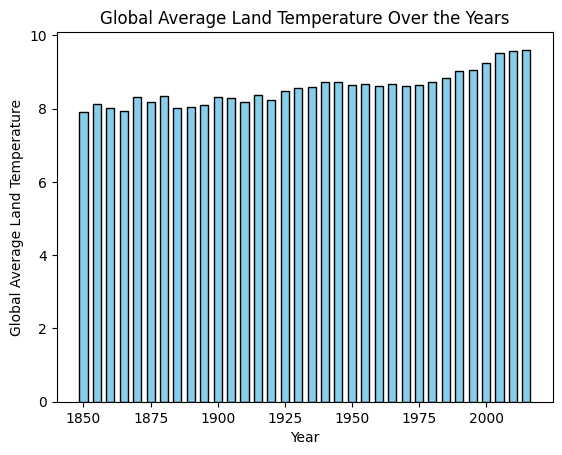

In [ ]:
# Data Visualization samples
# See the trend of the global temperature over the years
yearwiseAvgTemp = globTemp.resample("5YE").mean()

plt.bar(yearwiseAvgTemp.index.year, yearwiseAvgTemp["LandAverageTemperature"], color="skyblue", edgecolor="black", width=3)
plt.title("Global Average Land Temperature Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Average Land Temperature")
plt.show()

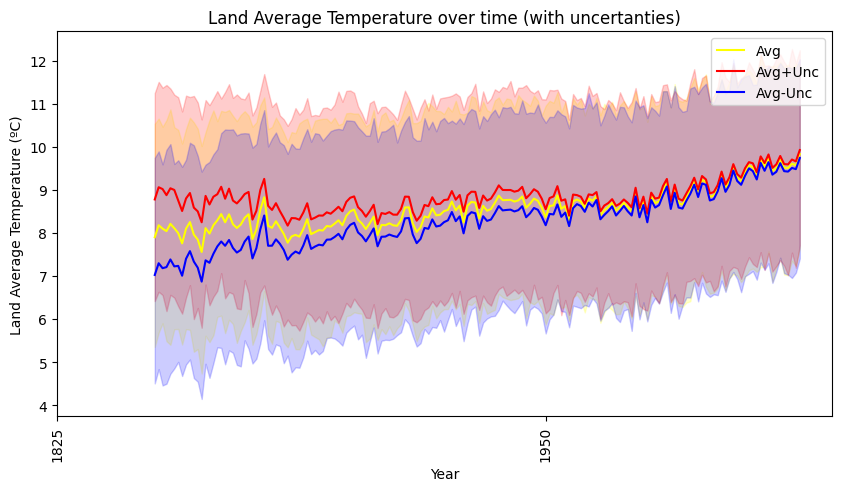

In [ ]:
df_global = globTemp
df_global["Year"] = df_global.index.year
df_global["LandAverageTemperature+Unc"] = df_global["LandAverageTemperature"] + \
    df_global["LandAverageTemperatureUncertainty"]
df_global["LandAverageTemperature-Unc"] = df_global["LandAverageTemperature"] - \
    df_global["LandAverageTemperatureUncertainty"]

fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(df_global, x='Year', y='LandAverageTemperature',
             color='yellow', ax=ax, label="Avg")
sns.lineplot(df_global, x='Year',
             y='LandAverageTemperature+Unc', color='red', ax=ax, label="Avg+Unc")
sns.lineplot(df_global, x='Year',
             y='LandAverageTemperature-Unc', color='blue', ax=ax, label="Avg-Unc")

plt.title('Land Average Temperature over time (with uncertanties)')
plt.ylabel('Land Average Temperature (ºC)')
plt.xlabel('Year')

ax.set_xticks(ax.get_xticks()[::5], labels=ax.get_xticklabels()[::5],
              rotation=90,
              fontsize=10)

plt.legend()
fig.savefig('Evolution_Land_AverageTemperature.png')

plt.show()

# Analysis and Data Visualization

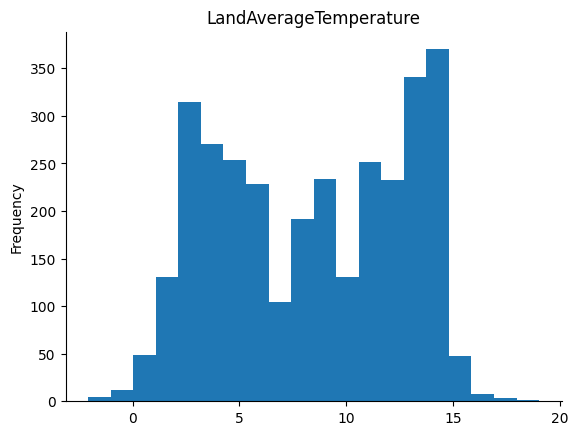

In [ ]:
# @title To find range LandAverageTemperature .

from matplotlib import pyplot as plt
df['LandAverageTemperature'].plot(kind='hist', bins=20, title='LandAverageTemperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

                dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...      

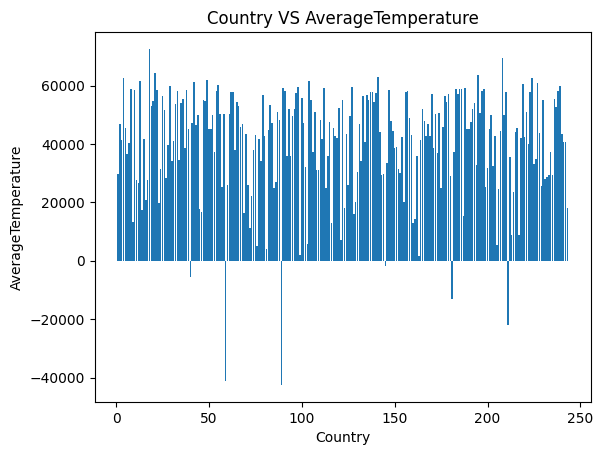

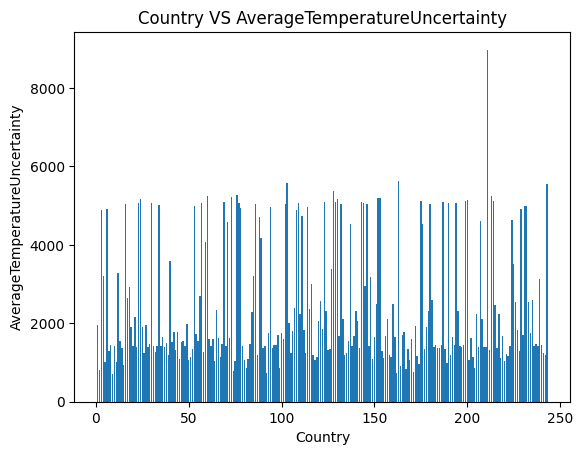

In [ ]:
# @title How the temperature vary for different country ?
df=pd.read_csv("datasets/GlobalLandTemperaturesByCountry.csv")
print(df)
df['AverageTemperature']=df['AverageTemperature'].fillna(np.mean(df['AverageTemperature']))
df['AverageTemperatureUncertainty']=df['AverageTemperatureUncertainty'].fillna(np.mean(df['AverageTemperatureUncertainty']))
df.isna()
data=pd.DataFrame(df)
data.drop("dt", axis=1, inplace=True)

data1=data.groupby("Country").sum()
import matplotlib.pyplot as plt
x_values = range(1, len(data1.index) + 1)
plt.bar(x_values, data1['AverageTemperature'])
plt.xlabel('Country')
plt.ylabel('AverageTemperature')
plt.title('Country VS AverageTemperature')
plt.show()


x_values = range(1, len(data1.index) + 1)
plt.bar(x_values, data1['AverageTemperatureUncertainty'])
plt.xlabel('Country')
plt.ylabel('AverageTemperatureUncertainty')
plt.title('Country VS AverageTemperatureUncertainty')
plt.show()

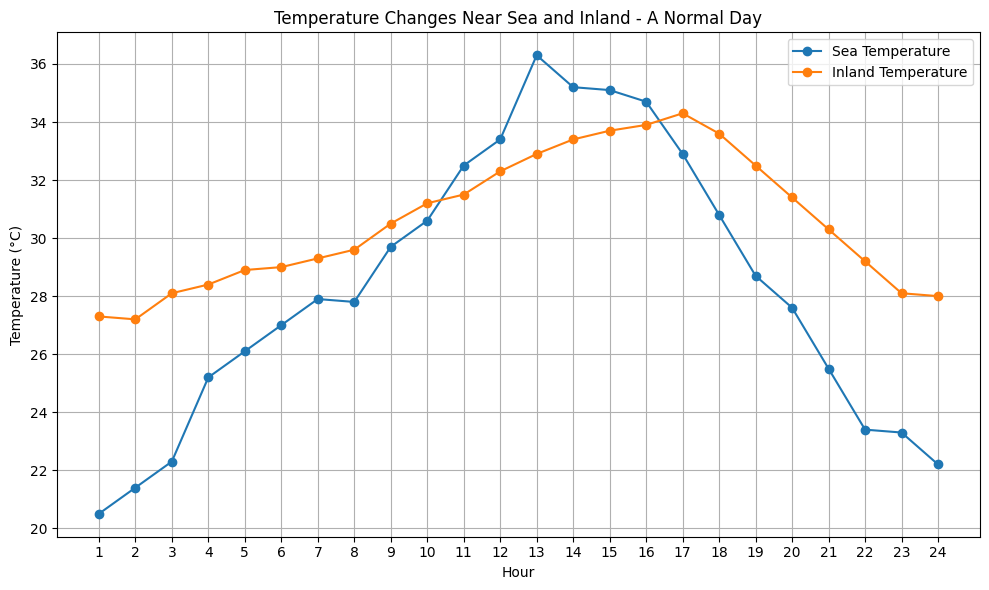

In [ ]:
# @title Impact of water body's on land temparature.
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for a single day with temperature readings for every hour
data = {
    'Hour': range(1,25),
    'Sea_Temperature': [20.5, 21.4, 22.3, 25.2, 26.1, 27.0, 27.9, 27.8, 29.7, 30.6, 32.5, 33.4,
                        36.3, 35.2, 35.1, 34.7, 32.9, 30.8, 28.7,27.6, 25.5, 23.4, 23.3, 22.2],
    'Inland_Temperature': [27.3, 27.2, 28.1, 28.4, 28.9, 29.0, 29.3, 29.6, 30.5, 31.2, 31.5, 32.3,
                           32.9, 33.4, 33.7, 33.9, 34.3, 33.6, 32.5, 31.4, 30.3, 29.2, 28.1, 28.0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Hour'], df['Sea_Temperature'], marker='o', label='Sea Temperature')
plt.plot(df['Hour'], df['Inland_Temperature'], marker='o', label='Inland Temperature')
plt.title('Temperature Changes Near Sea and Inland - A Normal Day')
plt.xlabel('Hour')
plt.ylabel('Temperature (°C)')
plt.xticks(df['Hour'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# @title How the Topography effect the temperature
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import plotly.graph_objects as go

df = pd.read_csv("datasets/GlobalLandTemperaturesByCity.csv")
df.head()

dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E

In [ ]:
# Dropping columns with NaN
df.dropna(axis=0, inplace=True)

# Converting variables to float
df["Latitude"] = df["Latitude"].str.replace(r"[^\d.]", "", regex=True).astype(float).round(2)
df["Longitude"] = df["Longitude"].str.replace(r"[^\d.]", "", regex=True).astype(float).round(2)

# Selecting variables to plot
data = df[["AverageTemperature", "Latitude", "Longitude"]]
data.head()

AverageTemperature  Latitude  Longitude
0               6.068     57.05      10.33
5               5.788     57.05      10.33
6              10.644     57.05      10.33
7              14.051     57.05      10.33
8              16.082     57.05      10.33

In [ ]:

from scipy.interpolate import griddata
# Preparing vectors
x = np.array(data["Longitude"])
y = np.array(data["Latitude"])
z = np.array(data["AverageTemperature"])

# Creating a matrix
arr = np.column_stack((x, y, z))

# Interpolation
xv = np.linspace(min(arr[:, 0]), max(arr[:, 0]), 20)
yv = np.linspace(min(arr[:, 1]), max(arr[:, 1]), 20)
X, Y = np.meshgrid(xv, yv)
Z = griddata((arr[:, 0], arr[:, 1]), arr[:, 2], (X, Y), method="linear")

In [ ]:
# Creating the figure
import plotly.graph_objects as go
fig = go.Figure(data=go.Contour(
    z=Z,
    x=xv,
    y=yv,
    connectgaps=True,
    colorscale="spectral_r",
    line_smoothing=1,
    line_width=0.25,
    colorbar=dict(
        thickness=35,
        len=0.8,
        title="Temperature (ºC)",
        titlefont=dict(
            size=12
        )
    )
))

# Adding text to axes
fig.update_xaxes(title_text="Longitude")
fig.update_yaxes(title_text="Latitude")

# Adding a title, resizing, etc.
fig.update_layout(
    title="Average Temperature by Latitude and Longitude",
    autosize=False,
    width=800,
    height=500
)

fig.show()

In [ ]:
gltc = pd.read_csv("datasets/GlobalLandTemperaturesByCountry.csv")
global_temp_country = gltc.copy()
global_temp = pd.read_csv("datasets/GlobalTemperatures.csv")

 Mapping average temperature in the Countries

In [ ]:
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]
# remove the duplicate countries and countries for which there is no information about temperature

In [ ]:
global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [ ]:
countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] ==
                                               country]['AverageTemperature'].mean())


In [ ]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C')
            )
       ]

In [ ]:
#Extract the year from a date
years = np.unique(global_temp_country_clear['dt'].apply(lambda x: x[:4]))

#Let's create an array and add the values of average temperatures in the countries every 10 years
mean_temp_year_country = [ [0] * len(countries) for i in range(len(years[::10]))]

j = 0
for country in countries:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[::10]:
        mean_temp_year_country[i][j] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

### Countries by yearly temperature

In [ ]:
df = gltc[gltc['Country']=='India']

#dropping rows with NaN values
df.dropna(inplace=True)

# first lets bifurcate the months and year data for the dt
df.loc[:,'dt'] = pd.to_datetime(df['dt'])

df.loc[:,'month'] = [x.month for x in list(df['dt'])]
df.loc[:,'year'] = [x.year for x in list(df['dt'])]

<ipython-input-27-26def3683714>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-26def3683714>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-26def3683714>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



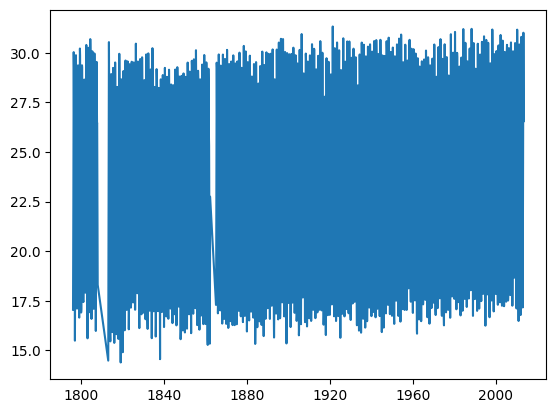

In [ ]:
plt.plot(df['dt'], df['AverageTemperature'])
plt.show()

#### Our Country - Midway from equtor - India 2012 Monthly Temperature

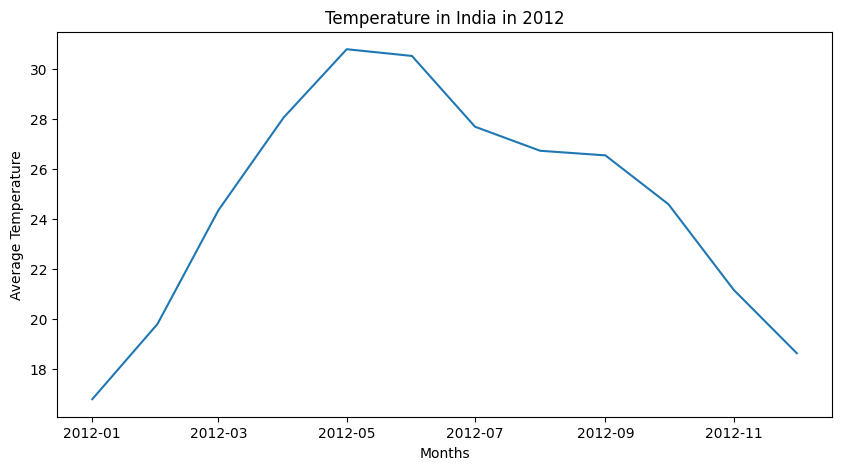

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(df.loc[df['year']==2012, 'dt'], df.loc[df['year']==2012,'AverageTemperature'])
plt.title('Temperature in India in 2012')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.show()

From the above plot we can understand that the temperature in India reaches it's highest point in the month of May and the lowest on  Dec-Feb.


#### Country with minimum average temperature (Greenland)

In [ ]:
gltc[gltc['AverageTemperature']==gltc['AverageTemperature'].min()]

dt  AverageTemperature  AverageTemperatureUncertainty  \
210436  1868-02-01             -37.658                          6.111   

          Country  
210436  Greenland

<ipython-input-31-0b0eb0fbb4ec>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-0b0eb0fbb4ec>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-0b0eb0fbb4ec>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



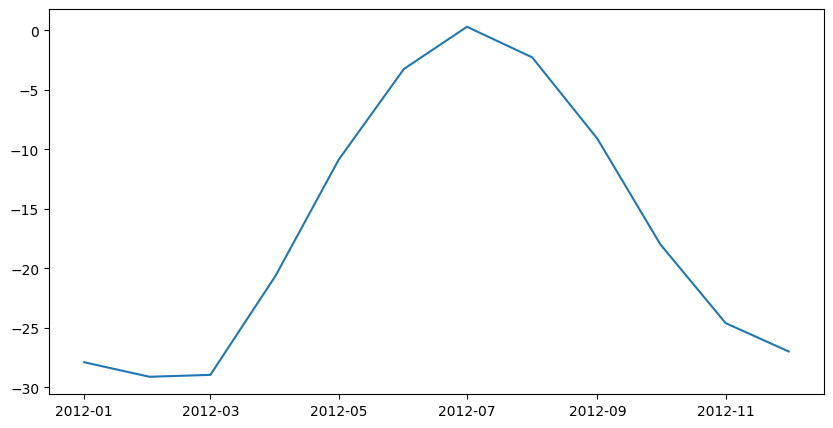

In [ ]:

df = gltc[gltc['Country']=='Greenland']
df.dropna(inplace=True)
df.loc[:,'dt'] = pd.to_datetime(df['dt'])
df.loc[:,'month'] = [x.month for x in list(df['dt'])]
df.loc[:,'year'] = [x.year for x in list(df['dt'])]
fig = plt.figure(figsize=(10,5))
plt.plot(df.loc[df['year']==2012, 'dt'], df.loc[df['year']==2012,'AverageTemperature'], title="")

plt.show()

From the above plot we can understand that the lowest temperature is in Greenland reaches it's highest point in the month of July and the lowest on  Dec-Feb.


#### Country with mamixmum average temperature (Kuwait)

In [ ]:
gltc[gltc['AverageTemperature']==gltc['AverageTemperature'].max()]

dt  AverageTemperature  AverageTemperatureUncertainty Country
284851  2012-07-01              38.842                          0.464  Kuwait

<ipython-input-32-3d0d384ad0e8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-3d0d384ad0e8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-32-3d0d384ad0e8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



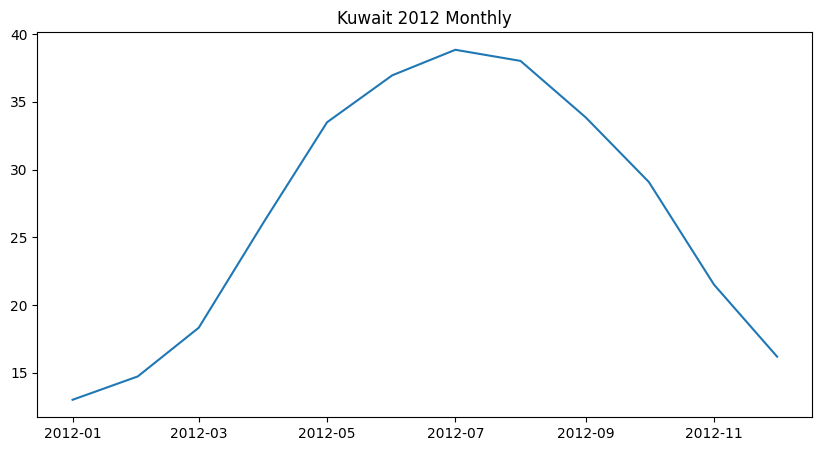

In [ ]:
df = gltc[gltc['Country']=='Kuwait']
df.dropna(inplace=True)
df.loc[:,'dt'] = pd.to_datetime(df['dt'])
df.loc[:,'month'] = [x.month for x in list(df['dt'])]
df.loc[:,'year'] = [x.year for x in list(df['dt'])]
fig = plt.figure(figsize=(10,5))
plt.plot(df.loc[df['year']==2012, 'dt'], df.loc[df['year']==2012,'AverageTemperature'])
plt.title("Kuwait 2012 Monthly")
plt.show()

From the above plot we can understand that the lowest temperature is in Kuwait reaches it's highest point in the month of July and the lowest on  Dec-Mar.


### Seasonal Temperature

In [ ]:
# drop unnecessary columns
global_temp = global_temp[['dt', 'LandAverageTemperature']]

global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())


In [ ]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

# 📔🔖Questions and Answers

1.	How has the global average temperature changed over the past century?
2.	What are the seasonal temperature patterns in different regions of the world?
3.	Is there a correlation between greenhouse gas emissions and global temperature trends?
4.	How have temperature anomalies varied over time in specific regions, such as the Arctic or tropical regions?
5.	Are there notable differences in temperature trends between urban and rural areas?
6.	How are the latitudes and longitudes correlated to the temperature changes?
7.	How has rate of change in temperature varied across years?
8.	What has been the influence of Historical Events and notable Natural Phenomenon on Change and Rate of change of temperatures?
9.	Are there any regions experiencing anomalous temperature trends that deviate from global averages?
10.	How much have different countries changed in terms of Land Average Temperature from late 19th century to early 21st century?



## Question 1

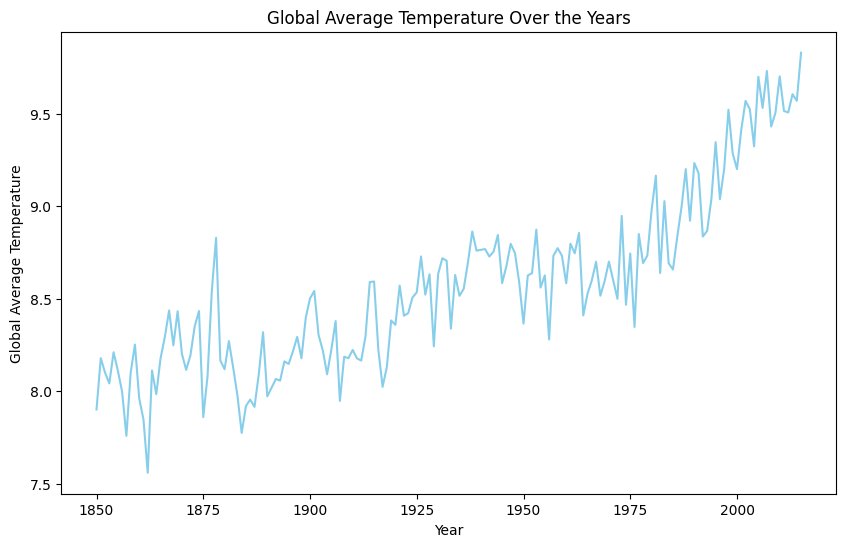

In [ ]:
# Answering 1: How has the global average temperature changed over the past century?
global_temp = globTemp.copy()
global_temp["year"] = global_temp.index.year
global_temp["month"] = global_temp.index.month
global_temp["day"] = global_temp.index.day

# Grouping by year
global_temp_yearly = global_temp.groupby("year").mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(global_temp_yearly.index, global_temp_yearly["LandAverageTemperature"], color="skyblue")
plt.title("Global Average Temperature Over the Years")
plt.xlabel("Year")
plt.ylabel("Global Average Temperature")
plt.show()

Looking at the plot above, it is clear that the global average temperature has risen over the past decades.

The global average temperature has increased by approximately 1.1 degrees Celsius since the late 19th century.

## Question 2

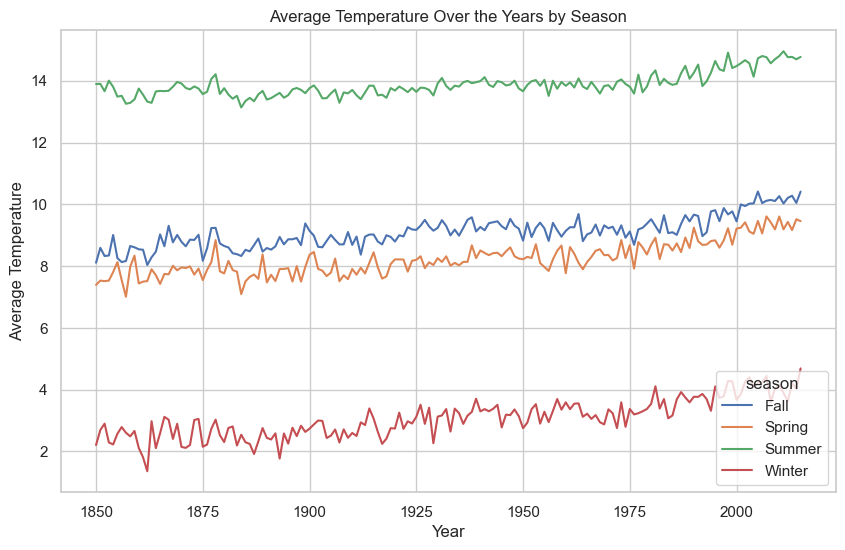

In [ ]:
# Answering 2: How has the average temperature changed in each season over the past century?
global_temp["season"] = (global_temp["month"] % 12 + 3) // 3
global_temp.replace({"season": {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}}, inplace=True)
global_temp_season = global_temp.groupby(["year", "season"]).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_temp_season, x="year", y="LandAverageTemperature", hue="season")
plt.title("Average Temperature Over the Years by Season")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

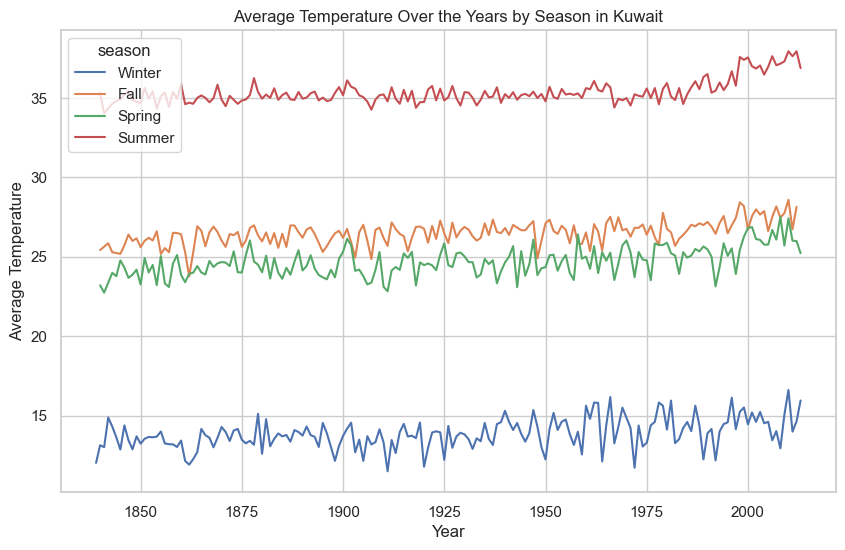

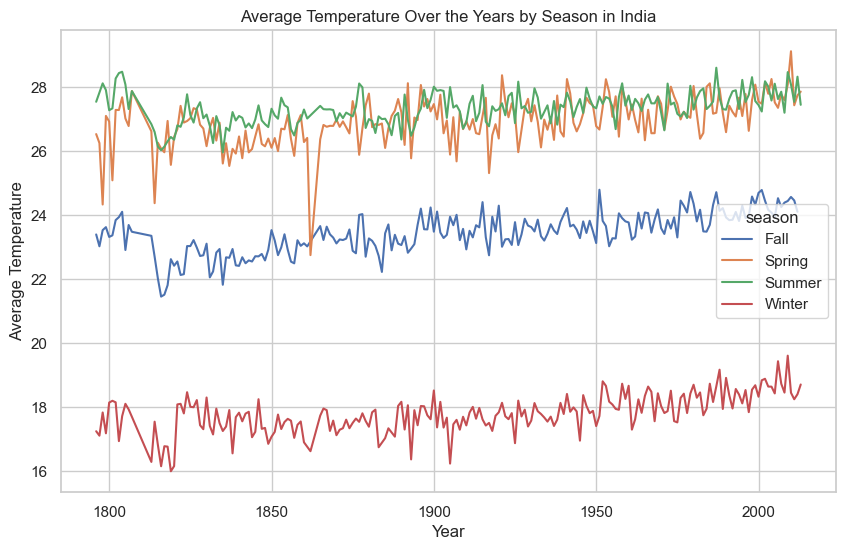

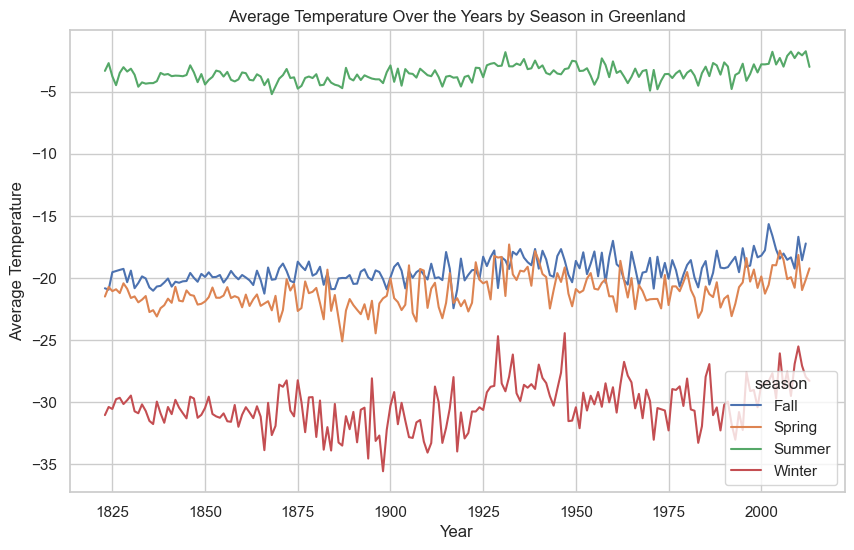

In [ ]:
# Doing the same seasonwise plotting but for individual countries: Kuwait (Hot), India (Native place), Greenland (Cold)
glob_temp_country = globTempCountry.copy()
glob_temp_country["year"] = glob_temp_country.index.year
glob_temp_country["month"] = glob_temp_country.index.month
glob_temp_country["day"] = glob_temp_country.index.day
glob_temp_country["season"] = (glob_temp_country["month"] % 12 + 3) // 3
glob_temp_country.replace({"season": {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}}, inplace=True)

# Kuwait
kuwait_temp = glob_temp_country[glob_temp_country["Country"] == "Kuwait"]
kuwait_temp_season = kuwait_temp.drop("Country", axis=1).groupby(["year", "season"]).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=kuwait_temp_season, x="year", y="AverageTemperature", hue="season")
plt.title("Average Temperature Over the Years by Season in Kuwait")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

# India
india_temp = glob_temp_country[glob_temp_country["Country"] == "India"]
india_temp_season = india_temp.drop("Country", axis=1).groupby(
    ["year", "season"]).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=india_temp_season, x="year",
             y="AverageTemperature", hue="season")
plt.title("Average Temperature Over the Years by Season in India")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

# Greenland
greenland_temp = glob_temp_country[glob_temp_country["Country"] == "Greenland"]
greenland_temp_season = greenland_temp.drop("Country", axis=1).groupby(["year", "season"]).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=greenland_temp_season, x="year", y="AverageTemperature", hue="season")
plt.title("Average Temperature Over the Years by Season in Greenland")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

# Looking at these plots, we can conclude that seasonal temperatures
# Globally:

Based on above plots for seasonal average temperatures, we can conclude about temperature changes
- Globally: Summers have remained the hottest, followed by fall, spring and finally winter.
- Kuwait: The range of temperatures is usually 12 °C - 36 °C
- India: Temperatures range between 16 °C and 30 °C
- Greenland: Temperatures range between -35 °C and 0°C

## Question 3

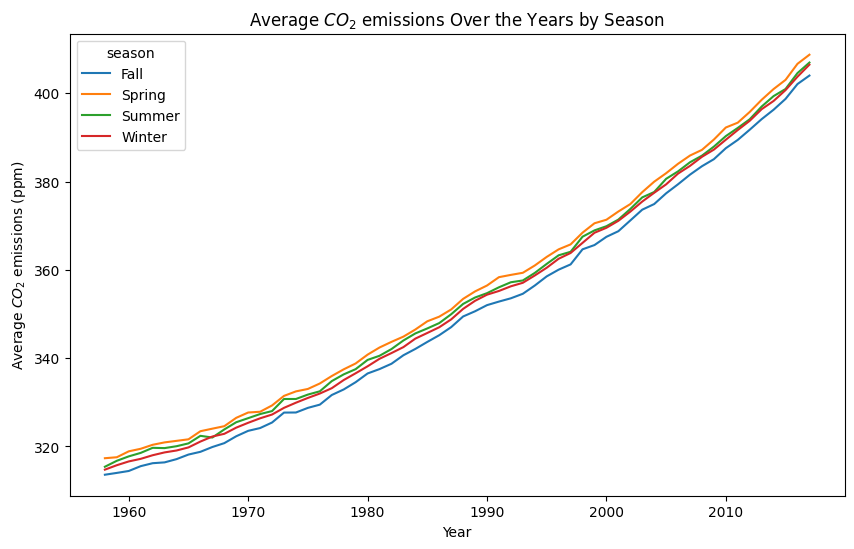

In [ ]:
# Answering 3: Is there a correlation between greenhouse gas emissions and global temperature trends?
# Using the co2-ppm-daily dataset
co2_data = pd.read_csv("datasets/co2-ppm-daily (1).csv")
co2_data["year"] = co2_data["date"].str[:4].astype(int)
co2_data["month"] = co2_data["date"].str[5:7].astype(int)
co2_data["season"] = (co2_data["month"] % 12 + 3) // 3
co2_data.replace({"season": {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}}, inplace=True)
co2_data_yearly = co2_data.drop("date", axis=1).groupby(["year", "season"]).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=co2_data_yearly, x="year", y="value", hue="season")
plt.title("Average $CO_2$ emissions Over the Years by Season")
plt.xlabel("Year")
plt.ylabel("Average $CO_2$ emissions (ppm)")
plt.show()

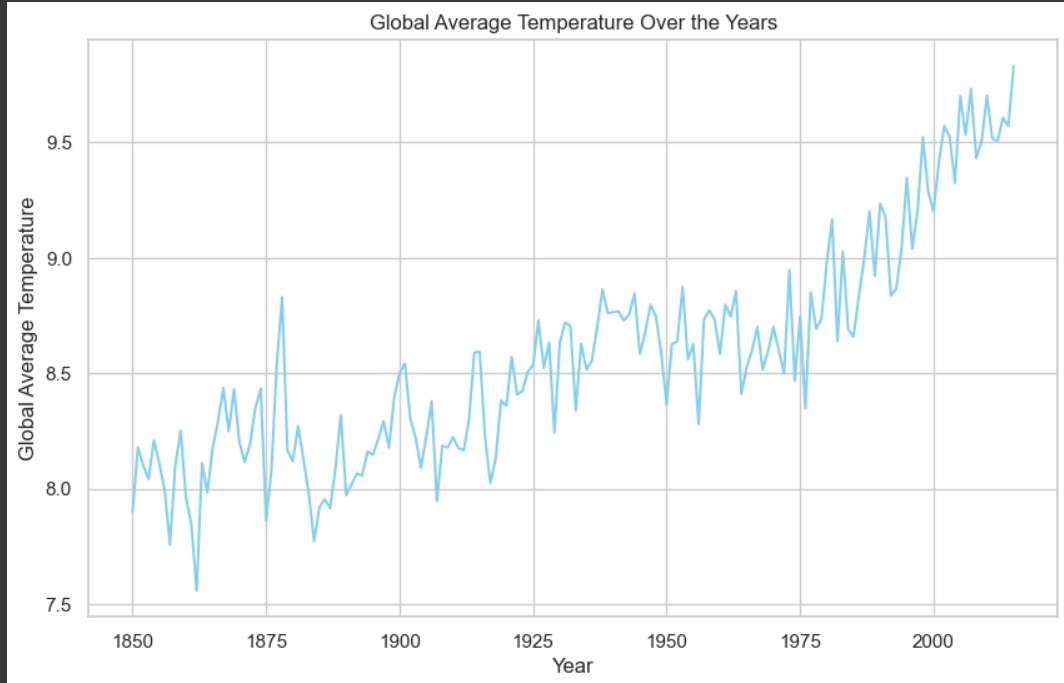

In [ ]:
co2_temp = pd.DataFrame({"CO2": co2_data_yearly[["value"]].tail(150).values.reshape(150),"Temp": global_temp_yearly[["LandAverageTemperature"]].tail(150).values.reshape(150)}, index=range(150))
co2_temp.set_index(co2_temp.index + 1866, inplace=True)
co2_temp["year"] = co2_temp.index
co2_temp

CO2      Temp  year
1866  339.591053  8.292167  1866
1867  338.146591  8.436333  1867
1868  337.516292  8.247917  1868
1869  342.404239  8.432083  1869
1870  340.528736  8.201333  1870
...          ...       ...   ...
2011  403.748902  9.516000  2011
2012  404.012532  9.507333  2012
2013  408.734133  9.606500  2013
2014  406.958193  9.570667  2014
2015  406.482530  9.831000  2015

[150 rows x 3 columns]

In [ ]:
print(co2_temp.corr())

           CO2      Temp      year
CO2   1.000000  0.871446  0.992903
Temp  0.871446  1.000000  0.851909
year  0.992903  0.851909  1.000000


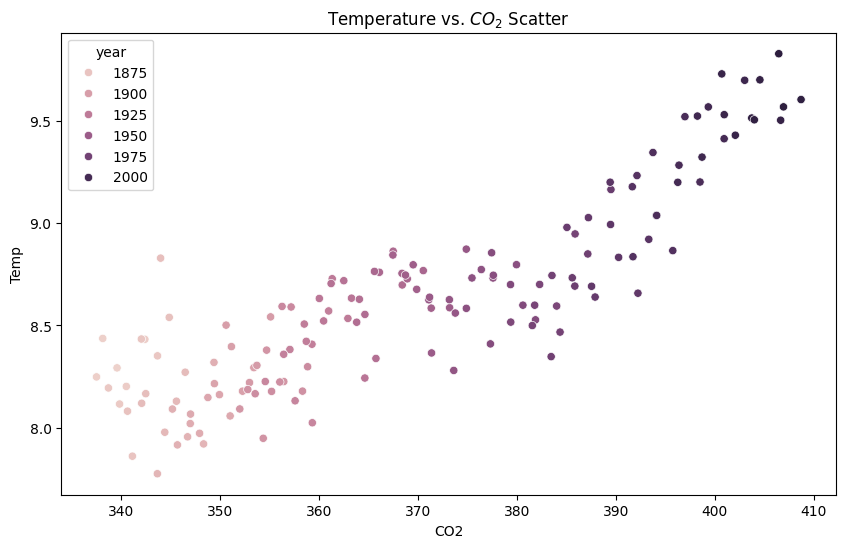

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=co2_temp, x="CO2", y="Temp", hue="year")
plt.title("Temperature vs. $CO_2$ Scatter")
plt.show()

## Question 4

In [ ]:
# Answering 4: How have temperature anomalies varied over time in specific regions, such as the Antarctic or tropical regions?
# Using the country wise data

# Use the same as seasonal plots.

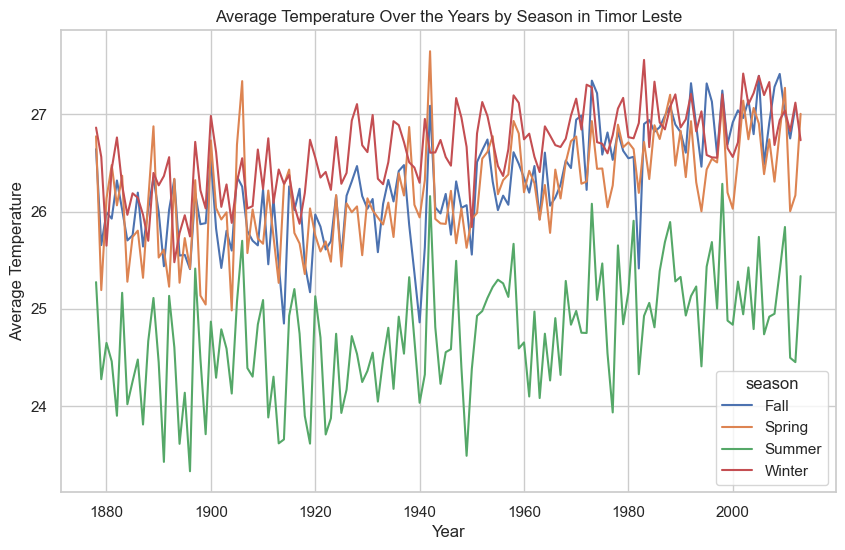

In [ ]:
timor_leste_temp = glob_temp_country[glob_temp_country["Country"] == "Timor Leste"]
timor_leste_temp_season = timor_leste_temp.drop("Country", axis=1).groupby(["year", "season"]).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=timor_leste_temp_season, x="year", y="AverageTemperature", hue="season")
plt.title("Average Temperature Over the Years by Season in Timor Leste")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

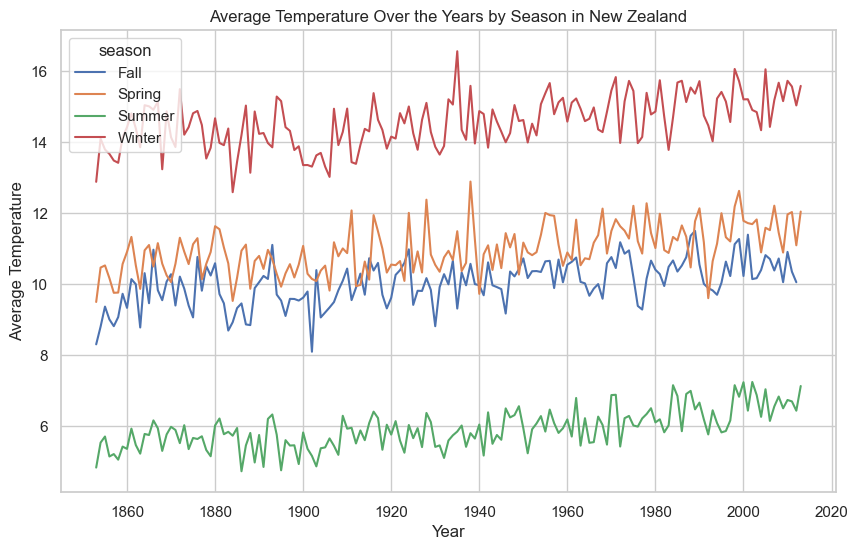

In [ ]:
new_zealand_temp = glob_temp_country[glob_temp_country["Country"] == "New Zealand"]
new_zealand_temp_season = new_zealand_temp.drop("Country", axis=1).groupby(["year", "season"]).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=new_zealand_temp_season, x="year", y="AverageTemperature", hue="season")
plt.title("Average Temperature Over the Years by Season in New Zealand")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

## Question 5

Urban

1.	New York
2.	Tokyo
3.	Shanghai
4.	Bombay
5.	Cairo

Rural

1.	Abohar
2.	Anchorage
3.	Campeche
4.	Luxor
5.	Oyama


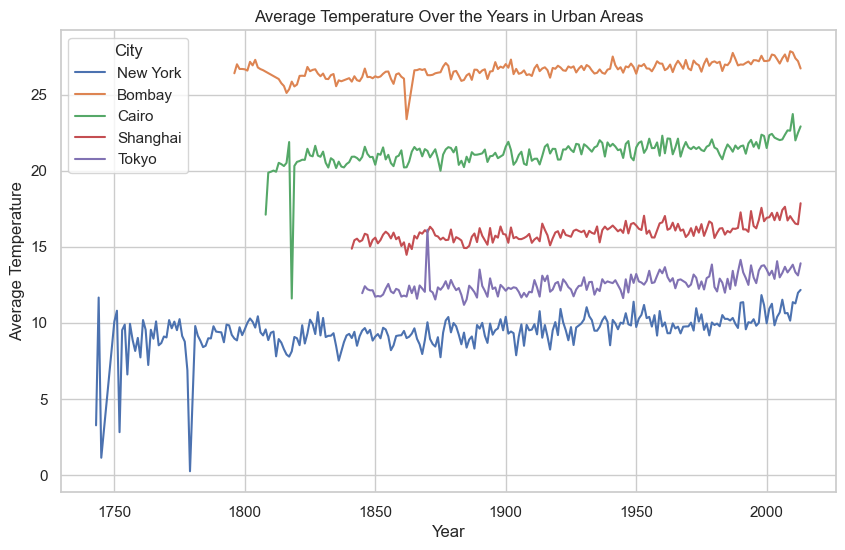

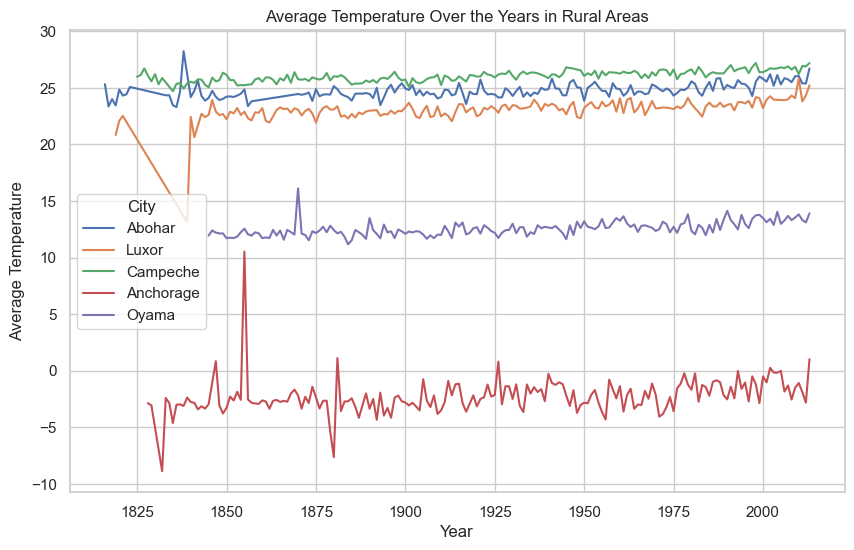

In [ ]:
# Answering 5: Are there notable differences in temperature trends between urban and rural areas?
urban = ["New York", "Tokyo", "Shanghai", "Bombay", "Cairo"]
rural = ["Abohar", "Anchorage", "Campeche", "Luxor", "Oyama"]

# Get yearly average temperatures for each city using globTempCity
glob_temp_city = globTempCity.copy()[["City", "AverageTemperature"]]
glob_temp_city["year"] = glob_temp_city.index.year
glob_temp_urban = glob_temp_city[glob_temp_city["City"].isin(urban)]
glob_temp_rural = glob_temp_city[glob_temp_city["City"].isin(rural)]

glob_temp_urban_yearly = glob_temp_urban.groupby(["year", "City"]).mean().reset_index()
glob_temp_rural_yearly = glob_temp_rural.groupby(["year", "City"]).mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=glob_temp_urban_yearly, x="year", y="AverageTemperature", hue="City")
plt.title("Average Temperature Over the Years in Urban Areas")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(data=glob_temp_rural_yearly, x="year", y="AverageTemperature", hue="City")
plt.title("Average Temperature Over the Years in Rural Areas")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()



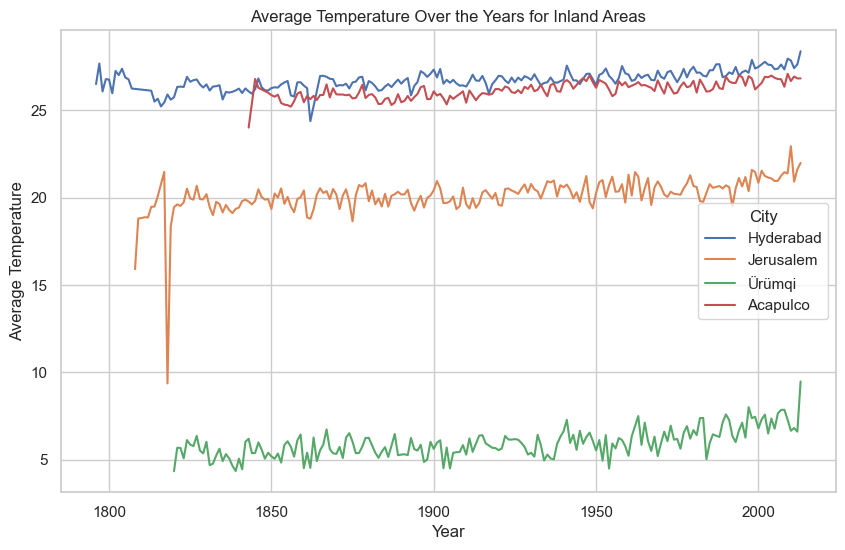

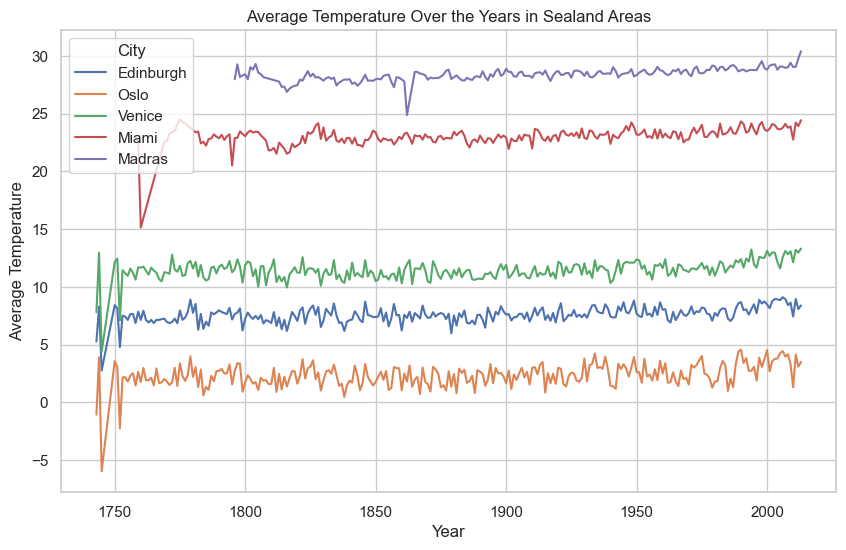

In [ ]:
# Answering 5.1: Are there notable differences in temperature trends between urban and rural areas?
inland = ["Hyderabad", "Jerusalem", "Acapulco", "Ürümqi"]
sealand = ["Madras", "Edinburgh", "Venice", "Miami", "Oslo"]

# Get yearly average temperatures for each city using globTempCity
glob_temp_city = globTempCity.copy()[["City", "AverageTemperature"]]
glob_temp_city["year"] = glob_temp_city.index.year
glob_temp_inland = glob_temp_city[glob_temp_city["City"].isin(inland)]
glob_temp_sealand = glob_temp_city[glob_temp_city["City"].isin(sealand)]

glob_temp_inland_yearly = glob_temp_inland.groupby(["year", "City"]).mean().reset_index()
glob_temp_sealand_yearly = glob_temp_sealand.groupby(["year", "City"]).mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=glob_temp_inland_yearly, x="year", y="AverageTemperature", hue="City")
plt.title("Average Temperature Over the Years for Inland Areas")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(data=glob_temp_sealand_yearly, x="year", y="AverageTemperature", hue="City")
plt.title("Average Temperature Over the Years in Sealand Areas")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

### Utils

In [ ]:
np.unique(globTempCity[globTempCity["Country"] == "Japan"]["City"])

array(['Abiko', 'Ageo', 'Akashi', 'Akishima', 'Akita', 'Amagasaki',
       'Anjo', 'Asahikawa', 'Asaka', 'Ashikaga', 'Atsugi', 'Beppu',
       'Chigasaki', 'Chofu', 'Daito', 'Ebetsu', 'Ebina', 'Fuchu', 'Fuji',
       'Fujieda', 'Fujimi', 'Fujinomiya', 'Fujisawa', 'Fukaya',
       'Fukuyama', 'Funabashi', 'Habikino', 'Hachinohe', 'Hachioji',
       'Hadano', 'Hakodate', 'Hamamatsu', 'Handa', 'Hikone', 'Himeji',
       'Hino', 'Hirakata', 'Hiratsuka', 'Hirosaki', 'Hiroshima',
       'Hitachi', 'Hofu', 'Ibaraki', 'Ichihara', 'Ichikawa', 'Ichinomiya',
       'Iida', 'Ikoma', 'Imabari', 'Inazawa', 'Iruma', 'Isehara',
       'Isesaki', 'Ishinomaki', 'Itami', 'Iwaki', 'Iwakuni', 'Iwatsuki',
       'Izumi', 'Joetsu', 'Kadoma', 'Kakamigahara', 'Kakogawa',
       'Kamagaya', 'Kamakura', 'Kariya', 'Kashihara', 'Kashiwa', 'Kasuga',
       'Kasugai', 'Kasukabe', 'Kawagoe', 'Kawaguchi', 'Kawanishi',
       'Kawasaki', 'Kiryu', 'Kisarazu', 'Kishiwada', 'Kitakyushu',
       'Kitami', 'Kobe', 'Kodaira'

## Question 6

In [ ]:
df = globTempCity
# Dropping columns with NaN
df.dropna(axis=0, inplace=True)

# Converting variables to float
df["Latitude"] = df["Latitude"].str.replace(r"[^\d.]", "", regex=True).astype(float).round(2)
df["Longitude"] = df["Longitude"].str.replace(r"[^\d.]", "", regex=True).astype(float).round(2)

# Selecting variables to plot
data = df[["AverageTemperature", "Latitude", "Longitude"]]
data.head()

AverageTemperature  Latitude  Longitude
dt                                                 
1743-11-01               6.068     57.05      10.33
1744-04-01               5.788     57.05      10.33
1744-05-01              10.644     57.05      10.33
1744-06-01              14.051     57.05      10.33
1744-07-01              16.082     57.05      10.33

In [ ]:

from scipy.interpolate import griddata
# Preparing vectors
x = np.array(data["Longitude"])
y = np.array(data["Latitude"])
z = np.array(data["AverageTemperature"])

# Creating a matrix
arr = np.column_stack((x, y, z))

# Interpolation
xv = np.linspace(min(arr[:, 0]), max(arr[:, 0]), 20)
yv = np.linspace(min(arr[:, 1]), max(arr[:, 1]), 20)
X, Y = np.meshgrid(xv, yv)
Z = griddata((arr[:, 0], arr[:, 1]), arr[:, 2], (X, Y), method="linear")

In [ ]:
# Creating the figure
import plotly.graph_objects as go
fig = go.Figure(data=go.Contour(
    z=Z,
    x=xv,
    y=yv,
    connectgaps=True,
    colorscale="spectral_r",
    line_smoothing=1,
    line_width=0.25,
    colorbar=dict(
        thickness=35,
        len=0.8,
        title="Temperature (ºC)",
        titlefont=dict(
            size=12
        )
    )
))

# Adding text to axes
fig.update_xaxes(title_text="Longitude")
fig.update_yaxes(title_text="Latitude")

# Adding a title, resizing, etc.
fig.update_layout(
    title="Average Temperature by Latitude and Longitude",
    autosize=False,
    width=800,
    height=500
)

fig.show()

## Question 7
How has the rate of change of temperature varied across years?

        LandAverageTemperature  LandAverageTemperatureUncertainty  \
decade                                                              
1850                       NaN                                NaN   
1860                  0.039883                          -0.167292   
1870                  0.172200                          -0.143058   
1880                 -0.230192                          -0.107075   
1890                  0.103642                          -0.068442   
1900                  0.107058                          -0.041350   
1910                  0.023375                          -0.025575   
1920                  0.211817                          -0.006208   
1930                  0.149008                          -0.011467   
1940                  0.083742                          -0.018817   
1950                 -0.104583                          -0.059542   
1960                  0.012292                          -0.063258   
1970                  0.025275    

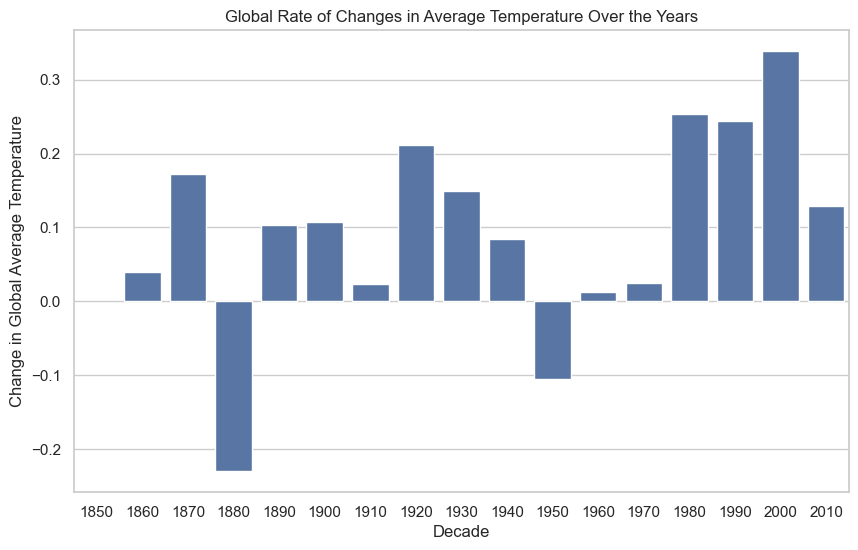

In [ ]:
# Answering 7: How has rate of change in temperature varied across years?
global_temp = globTemp.copy()
global_temp["year"] = global_temp.index.year
global_temp["month"] = global_temp.index.month
global_temp["day"] = global_temp.index.day
global_temp["decade"] = global_temp["year"] // 10 * 10

# Grouping by year
global_temp_yearly = global_temp.groupby("decade").mean()
diff_df = global_temp_yearly - global_temp_yearly.shift(1)
print(diff_df)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=diff_df, x="decade", y="LandAverageTemperature")
plt.title("Global Rate of Changes in Average Temperature Over the Years")
plt.xlabel("Decade")
plt.ylabel("Change in Global Average Temperature")
plt.show()

## Question 8
Global average temperature along with main events

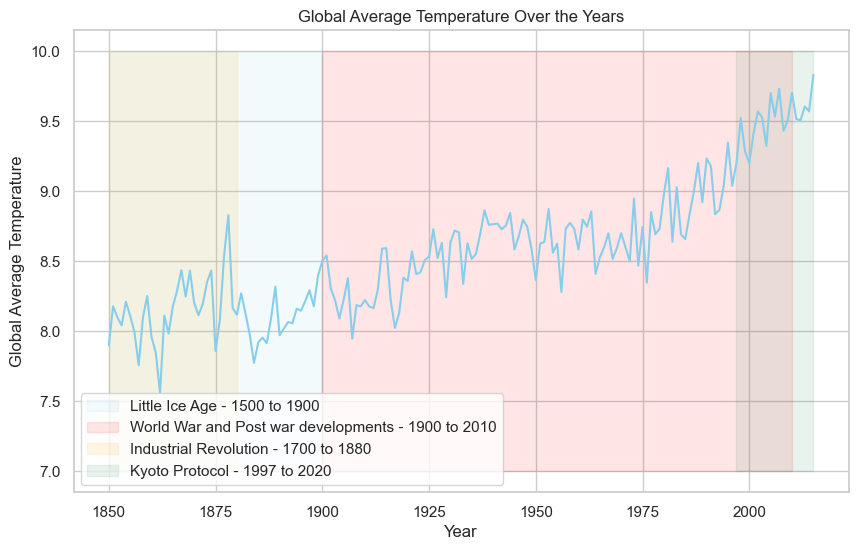

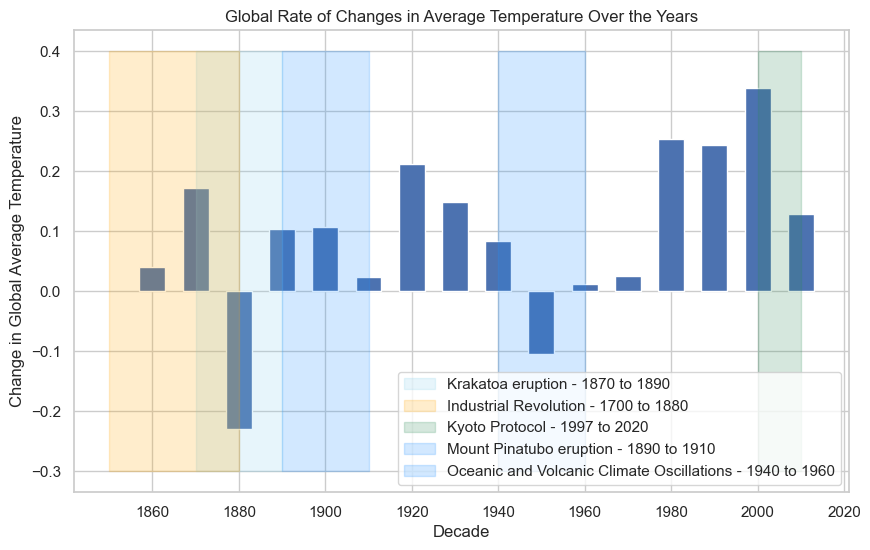

In [ ]:
# Answering 8: How have different historical events impacted the change in temperatures
global_temp = globTemp.copy()
global_temp["year"] = global_temp.index.year
global_temp["month"] = global_temp.index.month
global_temp["day"] = global_temp.index.day

# Grouping by year
global_temp_yearly = global_temp.groupby("year").mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(global_temp_yearly.index, global_temp_yearly["LandAverageTemperature"], color="skyblue")
plt.title("Global Average Temperature Over the Years")
events = [
    ("Little Ice Age", 1500, 1900, "skyblue"),
    ("World War and Post war developments", 1900, 2010, "red"),
    ("Industrial Revolution", 1700, 1880, "orange"),
    ("Kyoto Protocol", 1997, 2020, "seagreen"),
]
for event in events:
    plt.fill_between(global_temp_yearly.index, 7, 10, where=(event[1] <= global_temp_yearly.index) & (global_temp_yearly.index <= event[2]), alpha=0.1, label=f"{event[0]} - {event[1]} to {event[2]}", color=event[3]) # Little Ice age
plt.xlabel("Year")
plt.ylabel("Global Average Temperature")
plt.legend(loc="lower left")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(diff_df.index, diff_df["LandAverageTemperature"], width=6)
events = [
    ("Krakatoa eruption", 1870, 1890, "skyblue"),
    ("Industrial Revolution", 1700, 1880, "orange"),
    ("Kyoto Protocol", 1997, 2020, "seagreen"),
    ("Mount Pinatubo eruption", 1890, 1910, "dodgerblue"),
    ("Oceanic and Volcanic Climate Oscillations", 1940, 1960, "dodgerblue")
]
for event in events:
    plt.fill_between(diff_df.index, -0.3, 0.4, where=(event[1] <= diff_df.index) & (diff_df.index <= event[2]), alpha=0.2, label=f"{event[0]} - {event[1]} to {event[2]}", color=event[3]) # Little Ice age

plt.title("Global Rate of Changes in Average Temperature Over the Years")
plt.xlabel("Decade")
plt.ylabel("Change in Global Average Temperature")
plt.legend(loc="lower right")
plt.show()

## Question 9

In [ ]:
# Answering 9: Anamolous trends.

timor_leste_temp = glob_temp_country[glob_temp_country["Country"] == "Timor Leste"]
timor_leste_temp_season = timor_leste_temp.drop("Country", axis=1).groupby(["year", "season"]).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=timor_leste_temp_season, x="year", y="AverageTemperature", hue="season")
plt.title("Average Temperature Over the Years by Season in Timor Leste")
plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.show()

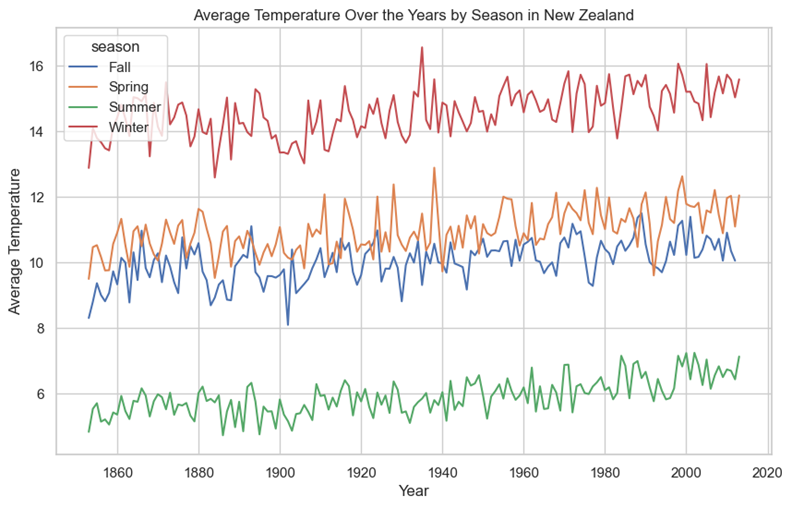

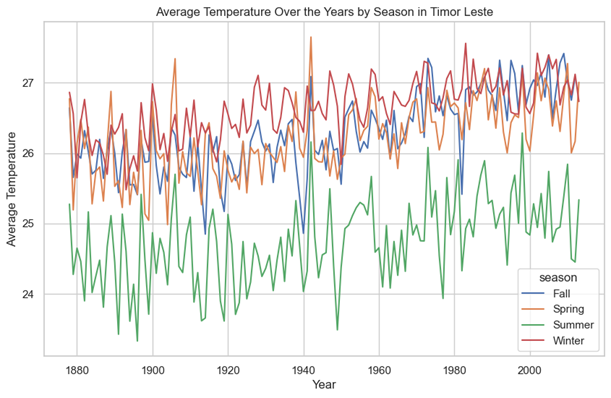

## Question 10: Country wise temperature rise heatmap plot on world map

In [ ]:
import plotly.express as px
from bokeh.plotting import *
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CustomJS, Select, RadioButtonGroup, Div, HoverTool

import geojson
import geopandas as gpd

import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from folium.features import DivIcon

import io
from PIL import Image, ImageDraw
import glob

from difflib import SequenceMatcher

In [ ]:
df_country = globTempCountry.copy()

df_country['Year'] = df_country.index.year
df_country['Decade'] = df_country.index.year % 100 // 10 + 1
df_country['AverageTemperature+Unc'] = df_country['AverageTemperature']+df_country['AverageTemperatureUncertainty']
df_country['AverageTemperature-Unc'] = df_country['AverageTemperature']-df_country['AverageTemperatureUncertainty']
df_country['Country'] = df_country['Country'].str.replace(' (Europe)', '')

In [ ]:
path = 'datasets/custom.geo.json'
gdf = gpd.read_file(path)

dict_countries = {
    'United States of America': 'United States',
    'The Bahamas': 'Bahamas',
    'Trinidad and Tobago': 'Trinidad And Tobago',
    'Saint Vincent and the Grenadines': 'Saint Vincent And The Grenadines',
    'Antigua and Barbuda': 'Antigua And Barbuda',
    'Saint Kitts and Nevis': 'Saint Kitts And Nevis',
    'United Republic of Tanzania': 'Tanzania',
    'Republic of the Congo': 'Congo',
    'Democratic Republic of the Congo': 'Congo (Democratic Republic Of The)',
    'Ivory Coast': "Côte D'Ivoire",
    'eSwatini': 'Swaziland',
    'Guinea-Bissau': 'Guinea Bissau',
    'São Tomé and Principe': 'Sao Tome And Principe',
    'Cabo Verde': 'Cape Verde',
    'Czechia': 'Czech Republic',
    'North Macedonia': 'Macedonia',
    'Republic of Serbia': 'Serbia',
    'Bosnia and Herzegovina': 'Bosnia And Herzegovina',
    'Turks and Caicos Islands': 'Turks And Caicas Islands',
    'Saint Pierre and Miquelon': 'Saint Pierre And Miquelon',
    'United States Virgin Islands': 'Virgin Islands',
    'Saint Barthelemy': 'Saint Barthélemy',
    'Falkland Islands': 'Falkland Islands (Islas Malvinas)',
    'Palestine': 'Palestina',
    'East Timor': 'Timor Leste',
    'Hong Kong S.A.R.': 'Hong Kong',
    'Macao S.A.R': 'Macau',
    'Isle of Man': 'Isle Of Man',
    'Aland': 'Åland',
    'Federated States of Micronesia': 'Federated States Of Micronesia'
}

gdf["admin_map"] = gdf["admin"].map(dict_countries)
gdf["admin"] = gdf.admin_map.combine_first(gdf.admin)

countries_gdf = gdf["admin"].unique()
countries_data = df_country['Country'].unique()

diff1 = [x for x in countries_gdf if x not in countries_data]
diff2 = [x for x in countries_data if x not in countries_gdf]

print(f"Countries in agg report but not in gdf: {diff2}")
print()
print(f"Countries in gdf but not in agg report: {diff1}")

Countries in agg report but not in gdf: ['Africa', 'Asia', 'Baker Island', 'Bonaire, Saint Eustatius And Saba', 'Burma', 'Christmas Island', 'Europe', 'French Guiana', 'French Southern And Antarctic Lands', 'Gaza Strip', 'Guadeloupe', 'Heard Island And Mcdonald Islands', 'Kingman Reef', 'Martinique', 'Mauritius', 'Mayotte', 'North America', 'Oceania', 'Palmyra Atoll', 'Reunion', 'Seychelles', 'South America', 'South Georgia And The South Sandwich Isla', 'Svalbard And Jan Mayen']

Countries in gdf but not in agg report: ['Bermuda', 'Brunei', 'Myanmar', 'Northern Cyprus', 'Siachen Glacier', 'Indian Ocean Territories', 'South Sudan', 'Somaliland', 'Kosovo', 'Vatican', 'Pitcairn Islands', 'Marshall Islands', 'Norfolk Island', 'Cook Islands', 'Wallis and Futuna', 'Tuvalu', 'Nauru', 'Vanuatu', 'Ashmore and Cartier Islands']


In [ ]:
# Old timeframe: [first year to consider, last year to consider]
old = [1870, 1874]

# New timeframe: [first year to consider, last year to consider]
# Bear in mind data only goes until 2013, and 2013 is incomplete
new = [2008, 2012]

if (old[0] < 1743):
    print('Please choose years after 1743')
if (new[1] > 2013):
    print('Please choose years until 2013')
if (len(old) != 2) or (len(new) != 2):
    print('Please choose two years in each timeframe')
if (old[1] < old[0]) or (new[1] < new[0]):
    print('Always define the lower year first')

cond_old = (df_country['Year'] >= (old[0])) & (
    df_country['Year'] <= (old[1]))
df_country.loc[cond_old, 'Period'] = 'Old'

cond_new = (df_country['Year'] >= (new[0])) & (
    df_country['Year'] <= (new[1]))
df_country.loc[cond_new, 'Period'] = 'New'

diff_temp = df_country.pivot_table(index='Country', columns='Period',
                                   values='AverageTemperature', aggfunc='mean')

diff_temp['Diff'] = diff_temp['New']-diff_temp['Old']

diff_temp = diff_temp.reset_index()

map_diff = gdf.merge(diff_temp, how='inner',
                     left_on='admin', right_on='Country')

map_diff = map_diff.set_geometry("geometry")

In [ ]:
m = folium.Map(location=[30, 0], zoom_start=1)

# for x in np.arange(len(map_countries)):
folium.Choropleth(
    geo_data=map_diff.loc[:, 'geometry'],
    data=map_diff['Diff'],
    key_on="feature.id",
    fill_color='OrRd',
    # bins=[-40, -20, 0, 20, 40]
).add_to(m)

folium.map.Marker(
    [-40, -40],
    icon=DivIcon(
        icon_size=(250, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 10pt">Increase in temperature by country</div>',
    )
).add_to(m)

folium.map.Marker(
    [-50, -20],
    icon=DivIcon(
        icon_size=(250, 36),
        icon_anchor=(0, 0),
        html='<div style="font-size: 10pt">' +
        str(new[0])+'-'+str(new[1])+' vs ' +
        str(old[0])+'-'+str(old[1])+'</div>',
    )
).add_to(m)

m.save('Increase_temperature_countries.html')

# Visualizar
m

C:\Users\gjayn\AppData\Local\Temp\ipykernel_13864\3908553486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Diff", y="Country",


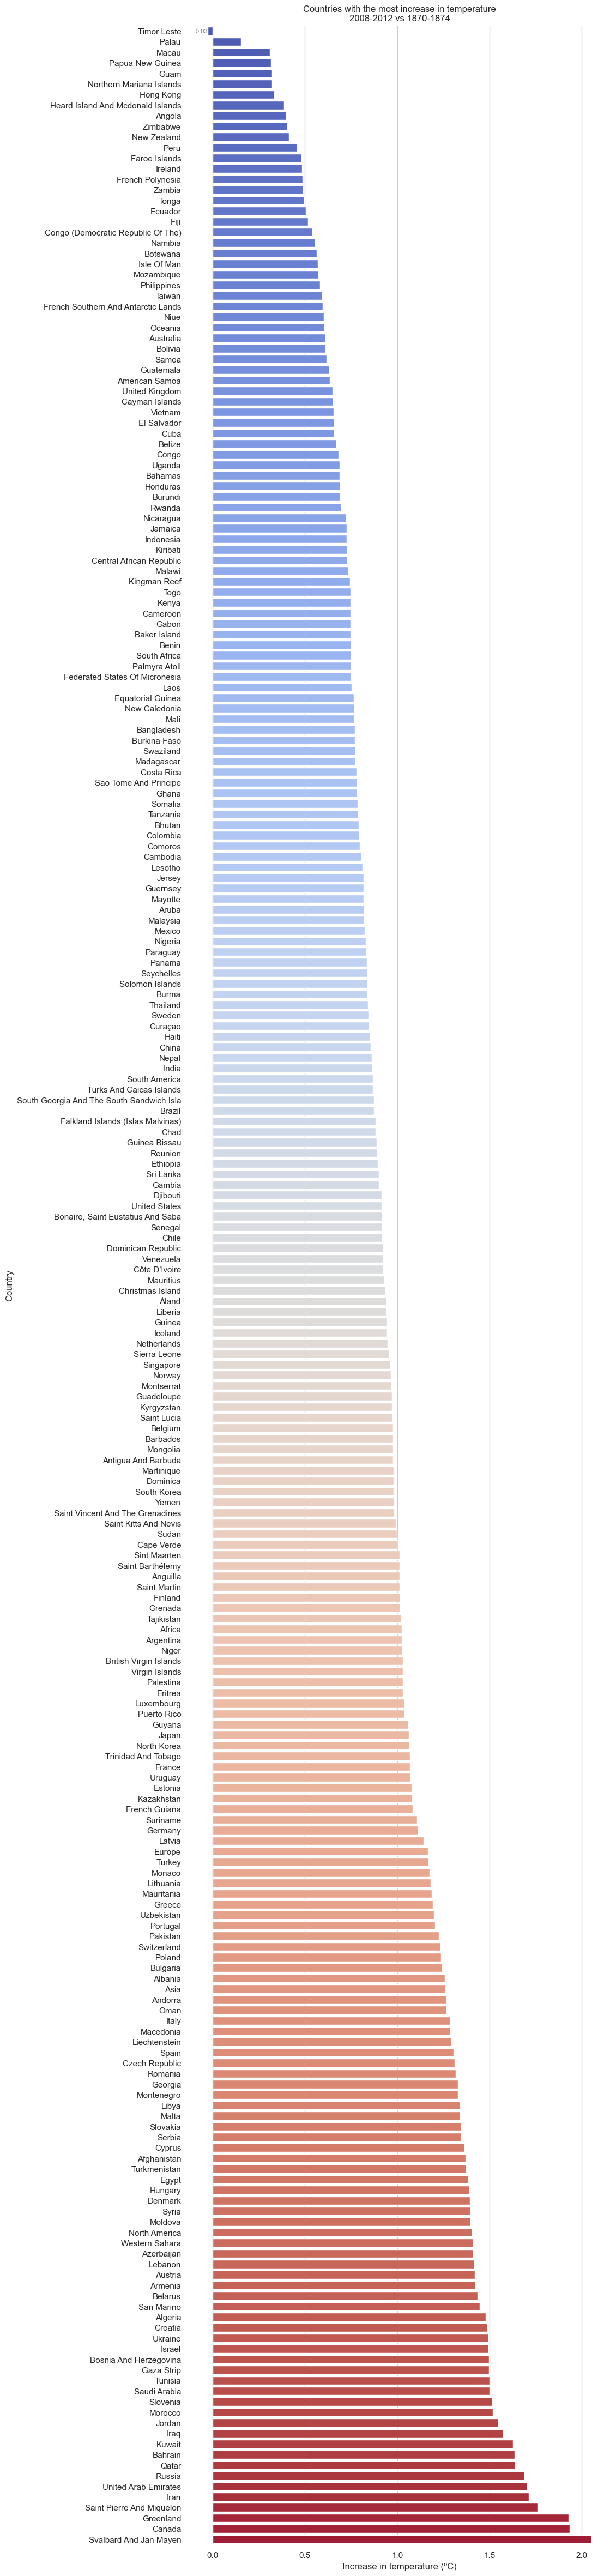

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 60))

# Plot the increases
sns.set_color_codes("pastel")
sns.barplot(x="Diff", y="Country",
            data=diff_temp.sort_values('Diff', ascending=True),
            label="Increase in temperature (ºC)", palette="coolwarm")

# Add a title and informative axis label
plt.title('Countries with the most increase in temperature\n'+str(new[0])+'-'+str(new[1])+' vs '+str(old[0])+'-'+str(old[1]))
ax.set(xlabel="Increase in temperature (ºC)")
ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=8, color='grey')
sns.despine(left=True, bottom=True)

f.savefig('Countries_highest_increase_temp.png')

In [ ]:
diff_temp.sort_values('Diff', ascending=True)

Period                    Country        New        Old      Diff
215                   Timor Leste  26.393633  26.421600 -0.027967
162                         Palau  27.677017  27.522600  0.154417
127                         Macau  22.805383  22.495867  0.309517
166              Papua New Guinea  24.914900  24.600600  0.314300
88                           Guam  27.352417  27.030383  0.322033
..                            ...        ...        ...       ...
102                          Iran  19.195933  17.483525  1.712408
182     Saint Pierre And Miquelon   5.977733   4.217175  1.760558
85                      Greenland -16.839850 -18.769892  1.930042
38                         Canada  -3.410433  -5.345667  1.935233
206        Svalbard And Jan Mayen  -5.319167  -7.372900  2.053733

[238 rows x 4 columns]

In [ ]:
## exploring


# Rough Work


In [ ]:
df = pd.read_csv("sample_data/mnist_train_small.csv")
df

6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
0      5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1      7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2      9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3      5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4      2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
...   .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
19994  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
19995  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
19996  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
19997  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
19998  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   

       0.584  0.585  0.586  0.587  0.588  0.589  0.590  
0          0      0      0      0      0      0      0  
1          0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0  
3          0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...  
19994      0      0      0      0      0      0      0  
19995      0      0      0      0      0      0      0  
19996      0      0      0      0      0      0      0  
19997      0      0      0      0      0      0      0  
19998      0      0      0      0      0      0      0  

[19999 rows x 785 columns]

In [ ]:
y = df["6"].values
X = df.drop("6", axis="columns").values

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
clf.fit(X, y)

clf

MLPClassifier()

In [ ]:
df_test = pd.read_csv("sample_data/mnist_test.csv")

y_test = df_test["7"].values
X_test = df_test.drop("7", axis=1).values

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.99      0.96      0.97      1135
           2       0.94      0.94      0.94      1032
           3       0.91      0.93      0.92      1010
           4       0.91      0.95      0.93       982
           5       0.93      0.90      0.92       892
           6       0.95      0.95      0.95       958
           7       0.92      0.94      0.93      1027
           8       0.89      0.92      0.91       974
           9       0.94      0.86      0.90      1009

    accuracy                           0.93      9999
   macro avg       0.93      0.93      0.93      9999
weighted avg       0.93      0.93      0.93      9999

